In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [146]:
weather = pd.read_csv('./Riyadh_weather.csv')

In [147]:
weather.head()

,date,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
0,2008-1-1,78,62,46,36,30,27,53,17,8,0,30.15,30.01
1,2008-1-2,80,68,55,39,33,30,41,20,14,4,30.06,29.95
2,2008-1-3,80,66,51,43,37,30,58,18,9,0,30.09,29.98
3,2008-1-4,71,65,59,57,45,36,82,37,13,0,30.09,29.98
4,2008-1-5,66,60,51,57,51,46,94,55,14,0,30.18,30.06


In [148]:
weather.isnull().sum()

date               0
Temperature_Max    0
Temperature_Avg    0
Temperature_Min    0
Dew_Point_Max      0
Dew_Point_Avg      0
Dew_Point_Min      0
Humidity_Max       0
Humidity_Min       0
Wind_speed_Max     0
Wind_speed_Min     0
Pressure_Max       0
Pressure_Min       0
dtype: int64

In [149]:
weather.date = pd.to_datetime(weather.date)

In [150]:
weather.dtypes
weather.shape

(4016, 13)

In [151]:
weather.set_index('date', inplace= True)

In [152]:
weather.head()

,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
date,,,,,,,,,,,,
2008-01-01,78,62,46,36,30,27,53,17,8,0,30.15,30.01
2008-01-02,80,68,55,39,33,30,41,20,14,4,30.06,29.95
2008-01-03,80,66,51,43,37,30,58,18,9,0,30.09,29.98
2008-01-04,71,65,59,57,45,36,82,37,13,0,30.09,29.98
2008-01-05,66,60,51,57,51,46,94,55,14,0,30.18,30.06


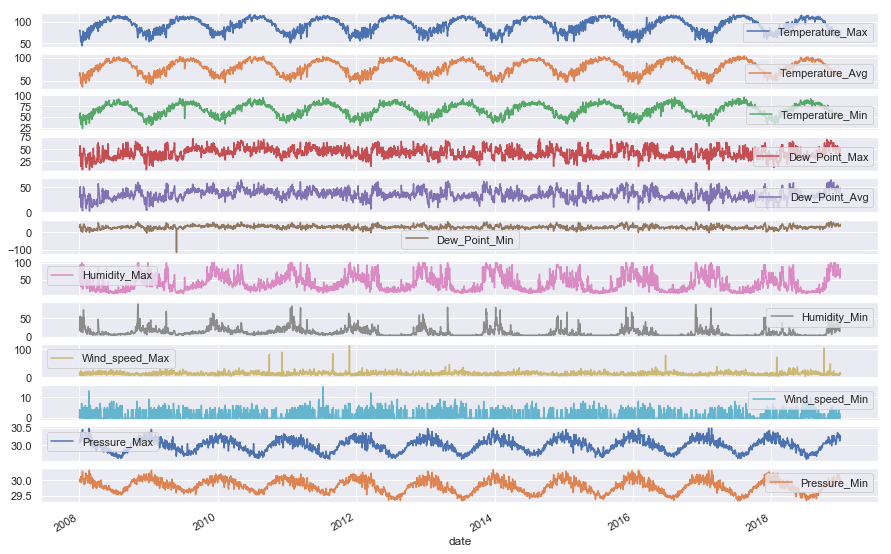

In [153]:
weather.plot(subplots=True, figsize=(15,10))

plt.show()

In [154]:
weather.describe()

,Temperature_Max,Temperature_Avg,Temperature_Min,Dew_Point_Max,Dew_Point_Avg,Dew_Point_Min,Humidity_Max,Humidity_Min,Wind_speed_Max,Wind_speed_Min,Pressure_Max,Pressure_Min
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,91.496763,78.940239,66.306026,41.836404,35.024900,28.726345,40.444472,11.735060,13.142430,1.195468,29.998825,29.814119
std,16.206974,14.971568,14.275661,10.496154,9.523537,9.675794,23.750423,10.733824,5.870256,2.039434,0.185788,0.214163
min,44.000000,37.000000,23.000000,7.000000,2.000000,-117.000000,9.000000,4.000000,2.000000,0.000000,29.590000,29.330000
25%,78.000000,66.000000,55.000000,34.000000,29.000000,23.000000,20.000000,4.000000,9.000000,0.000000,29.860000,29.650000
50%,94.000000,80.000000,68.000000,41.000000,34.000000,28.000000,34.000000,8.000000,13.000000,0.000000,30.010000,29.830000
75%,107.000000,93.000000,79.000000,48.000000,41.000000,34.000000,56.000000,15.000000,16.000000,2.000000,30.150000,29.980000
max,117.000000,104.000000,96.000000,72.000000,65.000000,63.000000,100.000000,88.000000,115.000000,15.000000,30.490000,30.360000


In [155]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [156]:
# Calculate ACF and PACF upto 50 lags
acf_50 = acf(weather.Temperature_Max, nlags=50)
pacf_50 = pacf(weather.Temperature_Max, nlags=50)


In [157]:
acf_50, pacf_50

(array([1.        , 0.95182539, 0.9183454 , 0.8986156 , 0.88965144,
        0.88385628, 0.87917955, 0.87296674, 0.86694072, 0.86199282,
        0.85605309, 0.85215959, 0.84864635, 0.84355344, 0.83775738,
        0.83071773, 0.82220691, 0.81786261, 0.81402222, 0.80940332,
        0.80363137, 0.79757636, 0.78747295, 0.77756579, 0.77079916,
        0.76504099, 0.7595222 , 0.75165421, 0.74218373, 0.73251031,
        0.72575596, 0.71718248, 0.70993607, 0.70286934, 0.69215198,
        0.6814863 , 0.67052288, 0.65884541, 0.65241301, 0.64519692,
        0.63664806, 0.6264768 , 0.6171139 , 0.60737833, 0.59909736,
        0.58911102, 0.57712582, 0.56774491, 0.55631821, 0.54261434,
        0.52920913]),
 array([ 1.00000000e+00,  9.52062461e-01,  1.32297845e-01,  1.55562828e-01,
         1.62232753e-01,  1.13479479e-01,  9.46418163e-02,  5.68239178e-02,
         5.42198161e-02,  5.28216060e-02,  2.46929916e-02,  4.92478905e-02,
         3.59600720e-02,  1.19881391e-02,  1.08530270e-02, -6.26637390

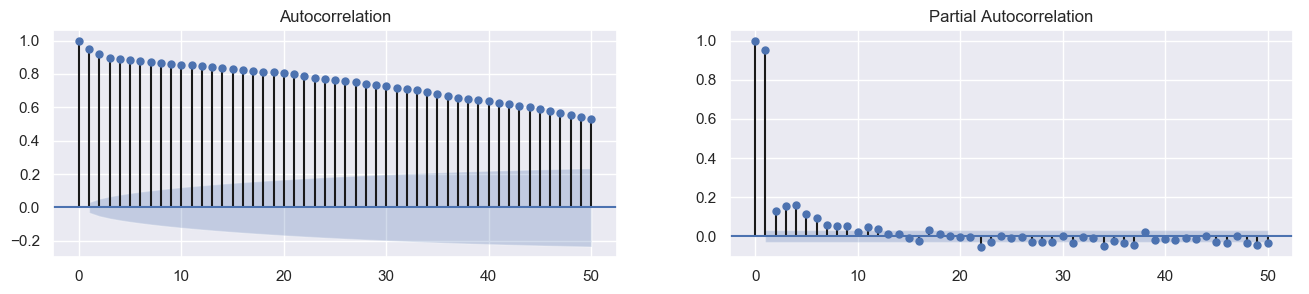

In [158]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(weather.Temperature_Max.tolist(), lags=50, ax=axes[0])
plot_pacf(weather.Temperature_Max.tolist(), lags=50, ax=axes[1]);

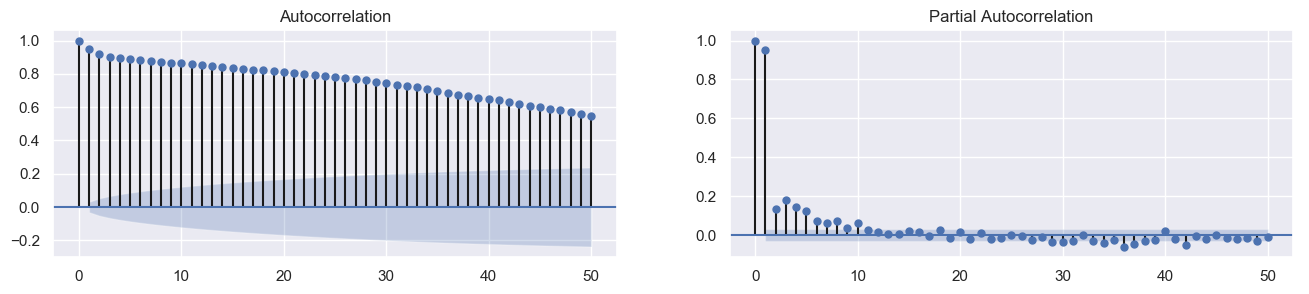

In [159]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(weather.Temperature_Min.tolist(), lags=50, ax=axes[0])
plot_pacf(weather.Temperature_Min.tolist(), lags=50, ax=axes[1]);

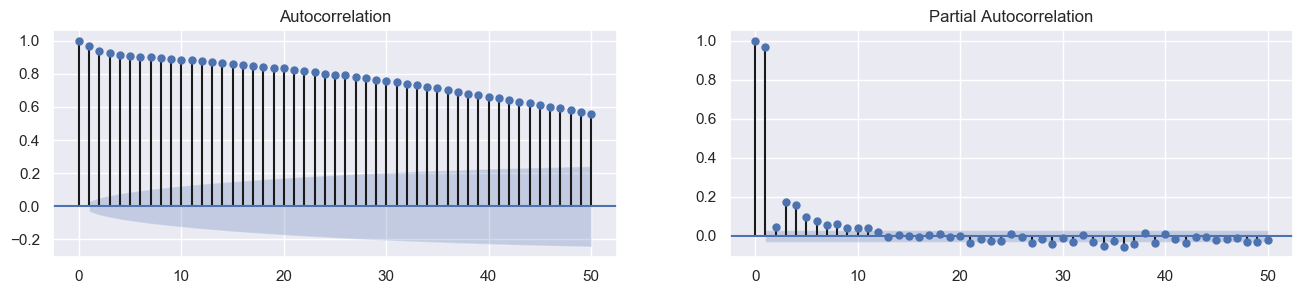

In [160]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(weather.Temperature_Avg.tolist(), lags=50, ax=axes[0])
plot_pacf(weather.Temperature_Avg.tolist(), lags=50, ax=axes[1]);

In [161]:
y = weather['Temperature_Max'].resample('MS').mean()

In [223]:
y

date
2008-01-01     63.290323
2008-02-01     70.379310
2008-03-01     88.032258
2008-04-01     92.633333
2008-05-01    102.548387
2008-06-01    106.266667
2008-07-01    110.419355
2008-08-01    109.258065
2008-09-01    104.700000
2008-10-01     91.935484
2008-11-01     77.066667
2008-12-01     69.645161
2009-01-01     67.677419
2009-02-01     76.464286
2009-03-01     80.548387
2009-04-01     90.433333
2009-05-01    103.193548
2009-06-01    107.300000
2009-07-01    108.258065
2009-08-01    108.806452
2009-09-01    104.666667
2009-10-01     94.129032
2009-11-01     81.833333
2009-12-01     70.870968
2010-01-01     72.870968
2010-02-01     79.392857
2010-03-01     87.064516
2010-04-01     92.033333
2010-05-01    100.193548
2010-06-01    108.800000
                 ...    
2016-07-01    110.838710
2016-08-01    110.322581
2016-09-01    104.666667
2016-10-01     93.096774
2016-11-01     79.366667
2016-12-01     72.354839
2017-01-01     70.516129
2017-02-01     64.107143
2017-03-01     80.00

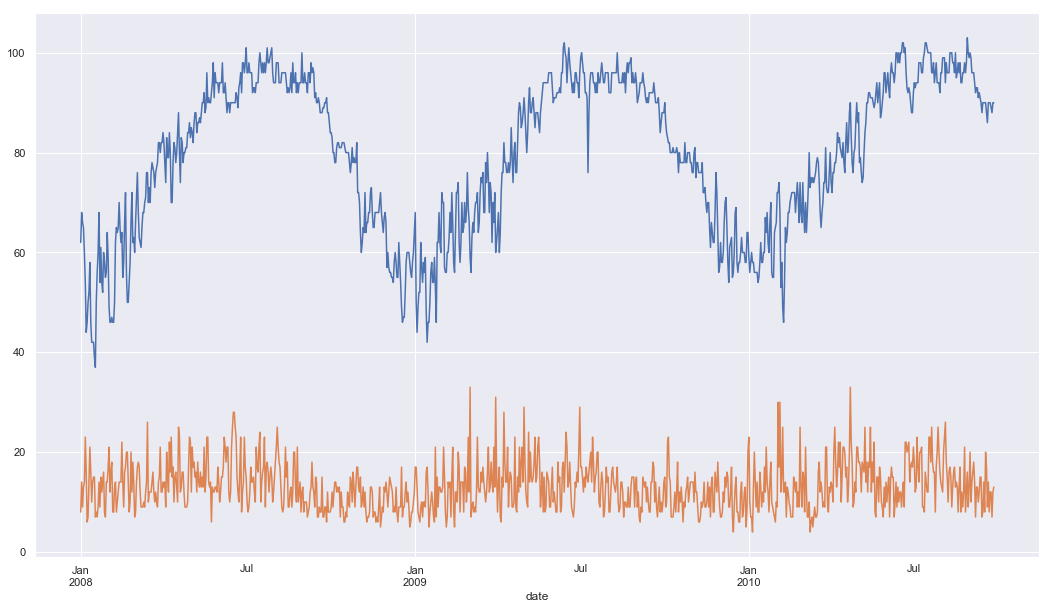

In [172]:
# the plot shows includes seasonality and outliers (noise) in Tempreture_max
weather.iloc[:1000, :]['Temperature_Avg'].plot();
weather.iloc[:1000, :]['Wind_speed_Max'].plot();

In [212]:
#weather.plot(x=weather.index ,y=['Temperature_Avg','Wind_speed_Max', 'Wind_speed_Min']);

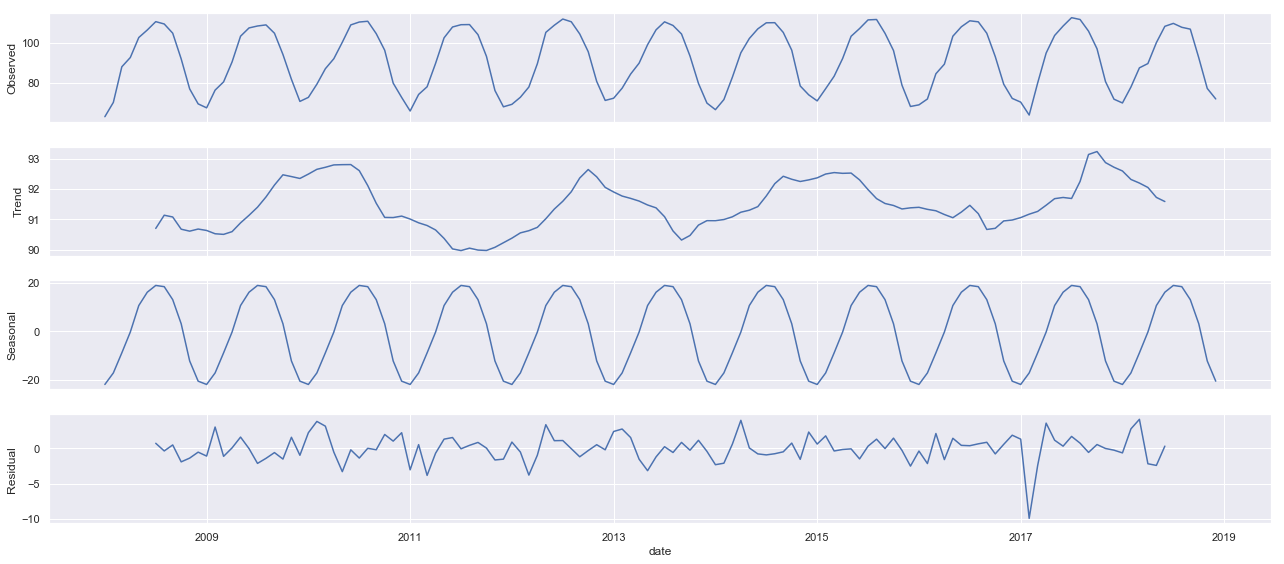

In [217]:
# showing the seasonality, trends and noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# use diff to stationarize the data
# UPPLY log diff"
#import numpy as np

#transformed = weather.copy()
#transformed= np.log(transformed).diff(1)
#transformed['wind_speed'] = np.log(df.iloc[:, 1]).diff(1)



In [ ]:
#transformed.shape, weather.shape

In [ ]:
#transformed.describe()
#transformed.isnull().sum()

In [ ]:
diff = weather.diff(periods=3)
plt.plot(diff)
plt.show()

In [ ]:
diff1 = weather['2009-3-29':'2009-12-1'].diff(periods=5)
plt.plot(diff1)
plt.show()

In [ ]:
## to extract specific columns from the data set :
#weather.columns = ['col1', 'col2']


In [ ]:
# so i have to drop the nans afrer the differencing
diff

In [ ]:
diff.isnull().sum()

In [ ]:
# do upsample to Month, with mean to diff dataframe:

diff.asfreq('MS').equals(diff.resample('MS').asfreq())

In [ ]:
diff_1.isnull().sum()

In [ ]:
diff_1.dropna(axis=0, inplace=True)

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize': (18, 10)})
g = sns.lineplot(data=diff_1.Temperature_Max, palette="tab10", linewidth=2.5, label="max")
g = sns.lineplot(data=diff_1.Temperature_Avg, palette="tab10", linewidth=2.5, label="avg")
g = sns.lineplot(data=diff_1.Temperature_Min, palette="tab10", linewidth=2.5, label="min")
g.tick_params(labelsize=10)
plt.xticks(rotation=45)
plt.show()

In [281]:
# normalize and standardizs the data after dropping unrequired columns:

## split and train the data

import statsmodels.api as sm

from statsmodels.tsa.api import VAR, DynamicVAR

In [282]:
model = VAR(diff_1)
results = model.fit(2)

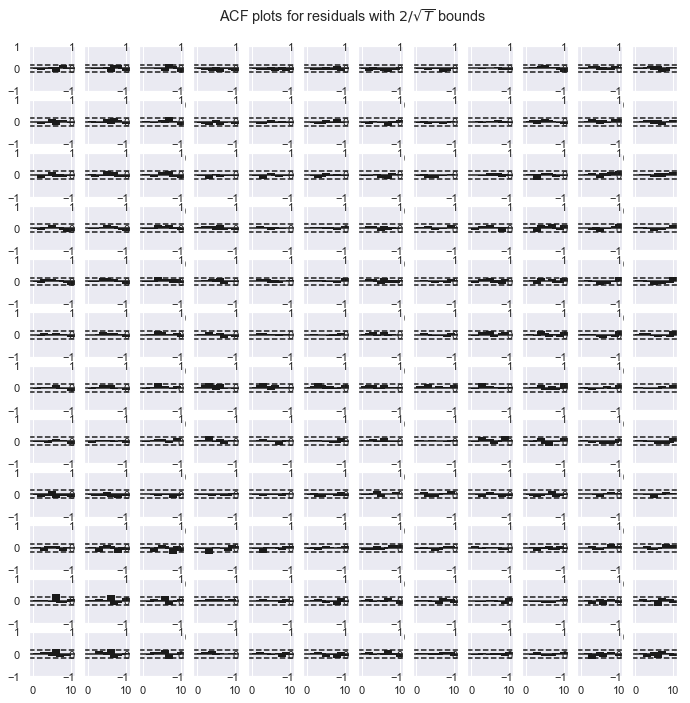

In [283]:
# to insure its Stationary, from the plots its stationary.
results.plot_acorr();

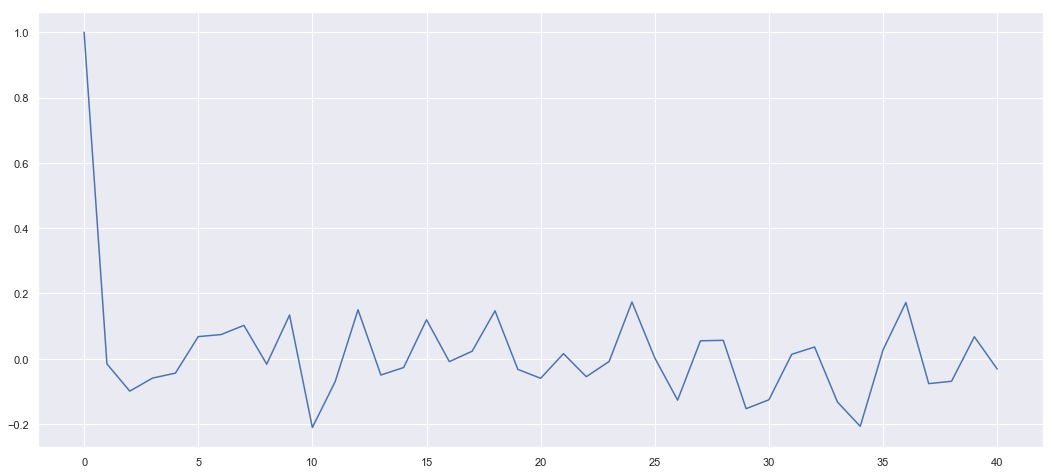

In [284]:
plt.plot(pacf(diff_1['Temperature_Min']))

In [ ]:
results.summary()

In [ ]:
results.plot();

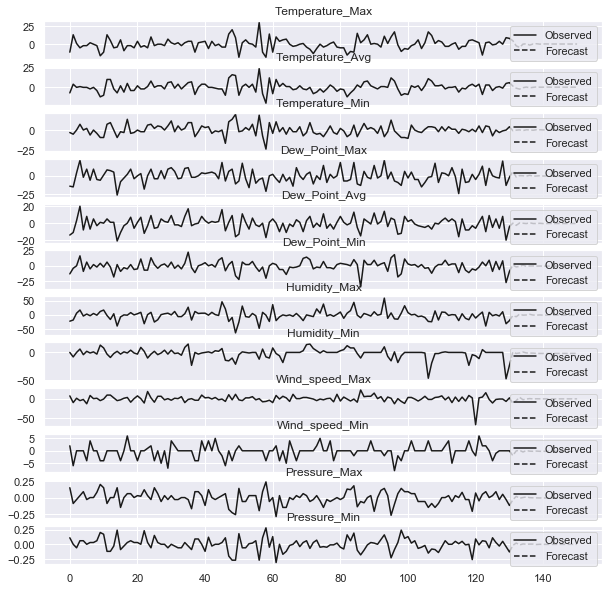

In [285]:
results.plot_forecast(steps=20, plot_stderr=False);

/Users/hebahmirza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


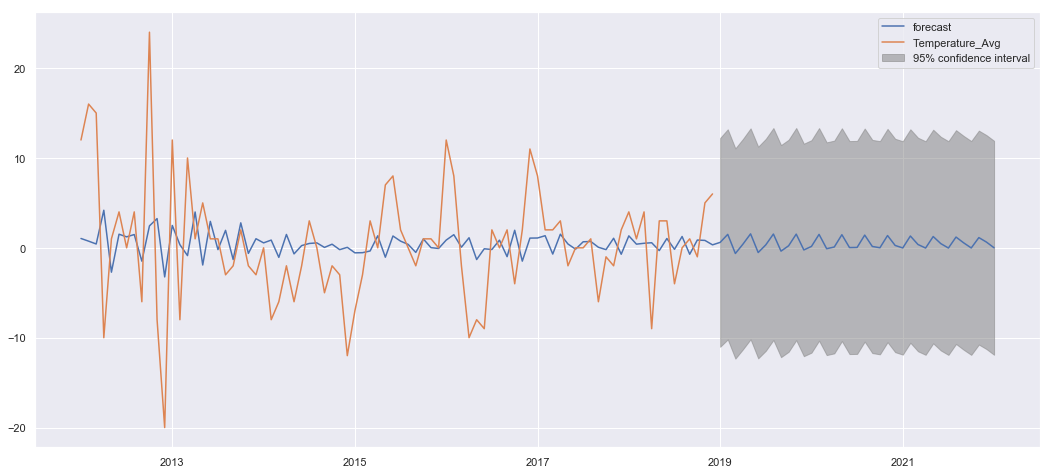

In [286]:
# to forcast Tempreture only:
from statsmodels.tsa.arima_model import ARIMA
mod= ARIMA(diff_1['Temperature_Avg'], order=(3,1,4))
res = mod.fit()
res.plot_predict(start='2012-1-1', end='2022-1-1')
plt.show()

In [ ]:
# rmse 
# invert the diff
# print the results:


# weather forcast Tempreture Avg, Wind_Max

## predict Tempreture/Wind_max forcast univariate

In [208]:

Temprerature_= weather.drop(['Temperature_Max', 'Temperature_Min','Dew_Point_Max', 'Dew_Point_Min','Humidity_Max',
                             'Humidity_Min', 'Wind_speed_Max', 'Wind_speed_Min', 'Pressure_Max','Pressure_Min',
                            'Dew_Point_Avg'], axis=1)

In [209]:
Temprerature_.head()

,Temperature_Avg
date,
2008-01-01,62
2008-01-02,68
2008-01-03,66
2008-01-04,65
2008-01-05,60


In [211]:
weather.shape, Temprerature_.shape

((4016, 12), (4016, 1))

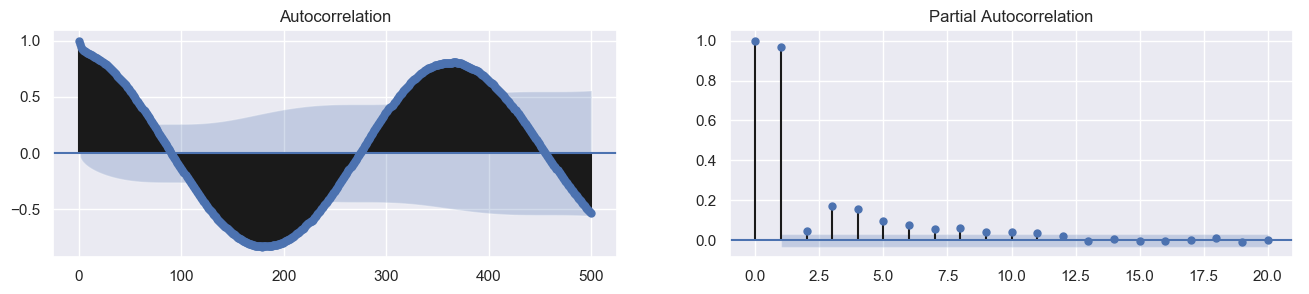

In [370]:
# Draw Plot, To check seasonality
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(Temprerature_.Temperature_Avg.tolist(), lags=500, ax=axes[0])
plot_pacf(Temprerature_.Temperature_Avg.tolist(), lags=300, ax=axes[1]);

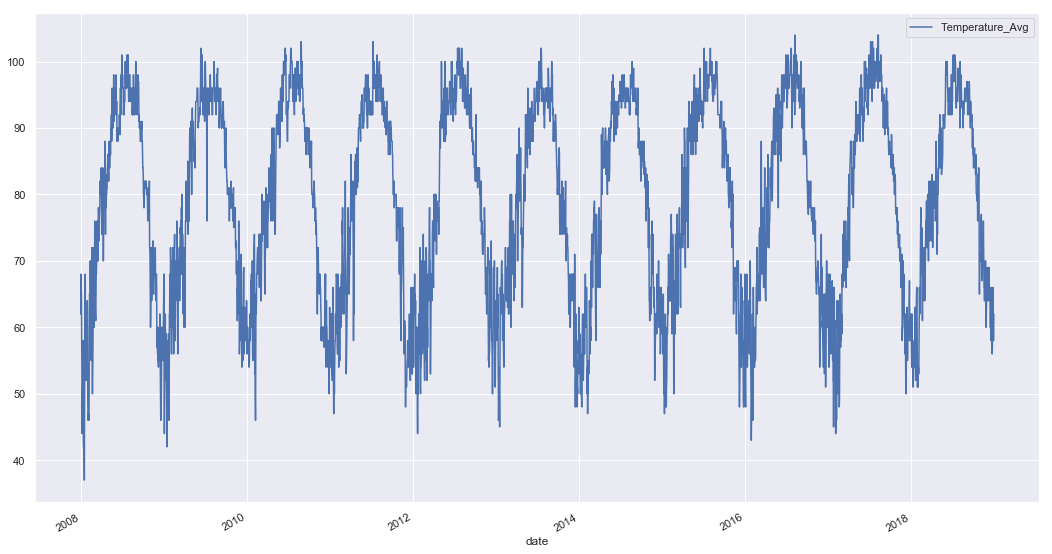

In [215]:
# clear seasonality and trend
Temprerature_.plot();

In [234]:
#T = Temprerature_.Temperature_Avg
T = Temprerature_['Temperature_Avg'].resample('MS').mean()

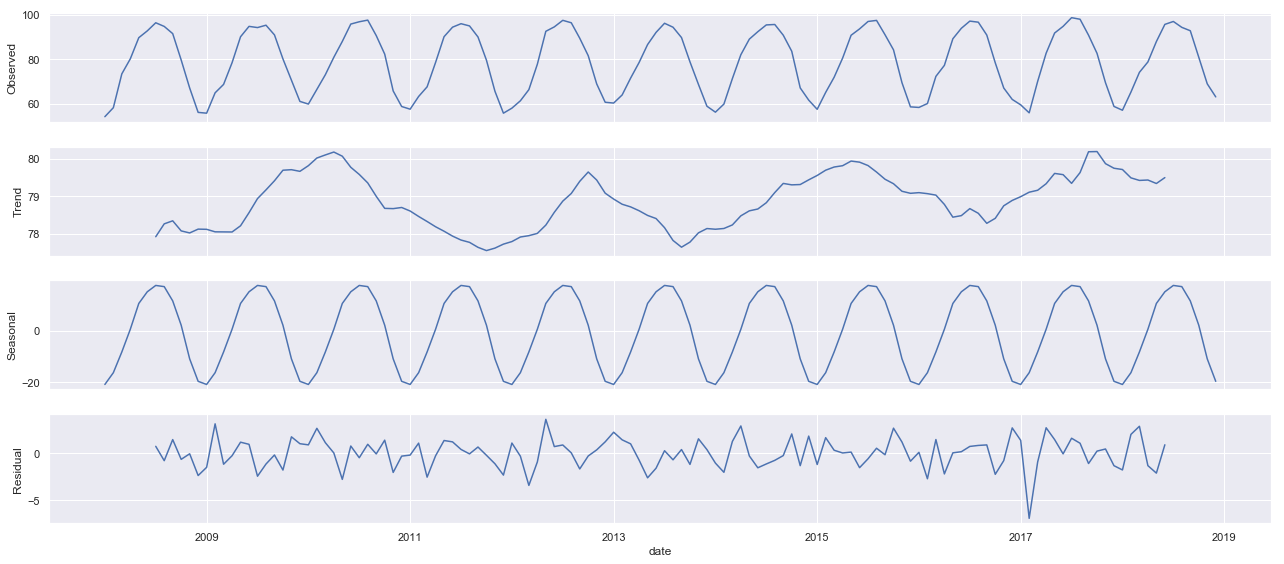

In [235]:
 # showing the seasonality, trends and noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(T, model='additive')
fig = decomposition.plot()
plt.show()

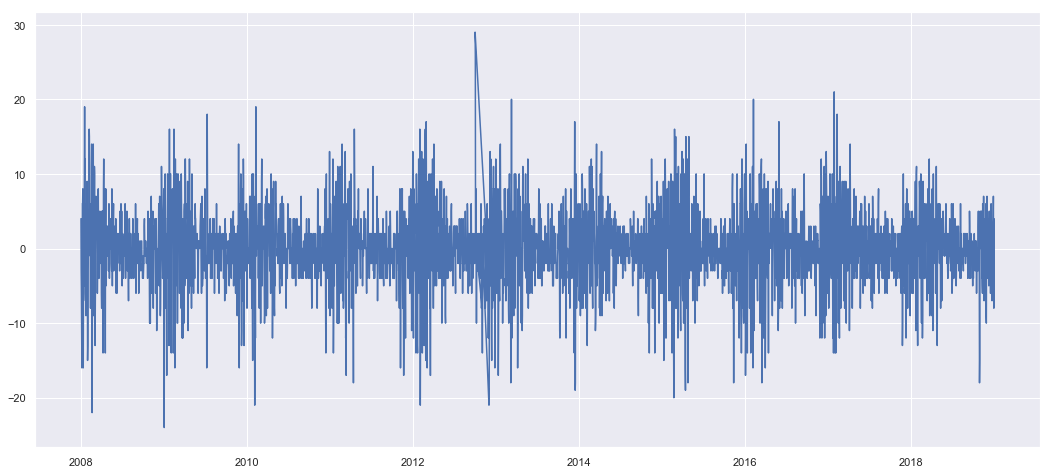

In [236]:
# Transforming our Dataframe data to become Stationary, using diff:
# diff_Tempreture = Temprerature_.diff(periods=2)
# plt.plot(diff_Tempreture)
# plt.show()

In [239]:
diff_Tempreture.head()

,Temperature_Avg
date,
2008-01-01,NaN
2008-01-02,NaN
2008-01-03,4.0
2008-01-04,-3.0
2008-01-05,-6.0


In [242]:
diff_Tempreture.dropna(inplace=True)

In [243]:
diff_Tempreture.head()

,Temperature_Avg
date,
2008-01-03,4.0
2008-01-04,-3.0
2008-01-05,-6.0
2008-01-06,-11.0
2008-01-07,-16.0


In [253]:
# test stationarity by Decay fuller test:
import statsmodels

In [245]:
#export_csv = diff_Tempreture.to_csv('\Downloads\diff_Tempr.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [371]:
from statsmodels.tsa.stattools import adfuller

X = Temprerature_['Temperature_Avg']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.230727
p-value: 0.000584
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# we can see that the ADF has a negative value less than Critical Values so, its stationary, 
# and we can regict the null hypothisis 
# so test statistics is < Critical values => so, our data is now stationary and we can apply the model


In [ ]:
# Apply prediction model AR

/Users/hebahmirza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


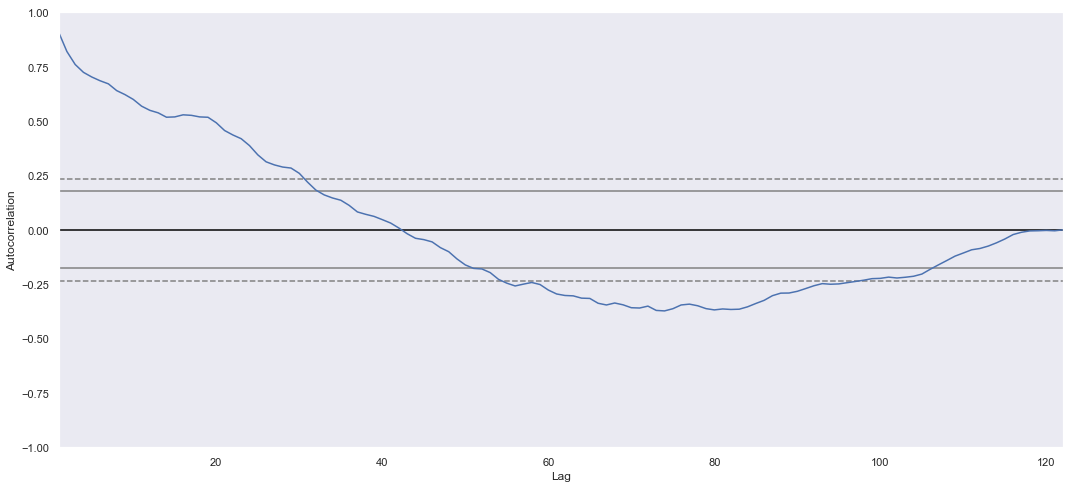

In [375]:
# how to choose the parameters?

from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(Temprerature_['2008-1-1':'2008-5-1'])
plt.show()

In [308]:
#one way to split data to train and test
from statsmodels.tsa.arima_model import ARIMA

# train= diff_Tempreture['2008-1-1':'2017-1-1']
# test = diff_Tempreture['2017-1-1':'2019-1-1']

In [309]:
len(train), len(test)

(3286, 729)

In [312]:
train.head()

,Temperature_Avg
date,
2008-01-03,4.0
2008-01-04,-3.0
2008-01-05,-6.0
2008-01-06,-11.0
2008-01-07,-16.0


/Users/hebahmirza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hebahmirza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.Temperature_Avg   No. Observations:                 4015
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10800.707
Method:                       css-mle   S.D. of innovations              3.565
Date:                Mon, 06 May 2019   AIC                          21619.415
Time:                        12:10:56   BIC                          21676.095
Sample:                             1   HQIC                         21639.503
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0021      0.049     -0.042      0.966      -0.098       0.094
ar.L1.D.Temperature_Avg     1.7512      0.022     80.920      0.000       1.709       1.794


/Users/hebahmirza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hebahmirza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/hebahmirza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


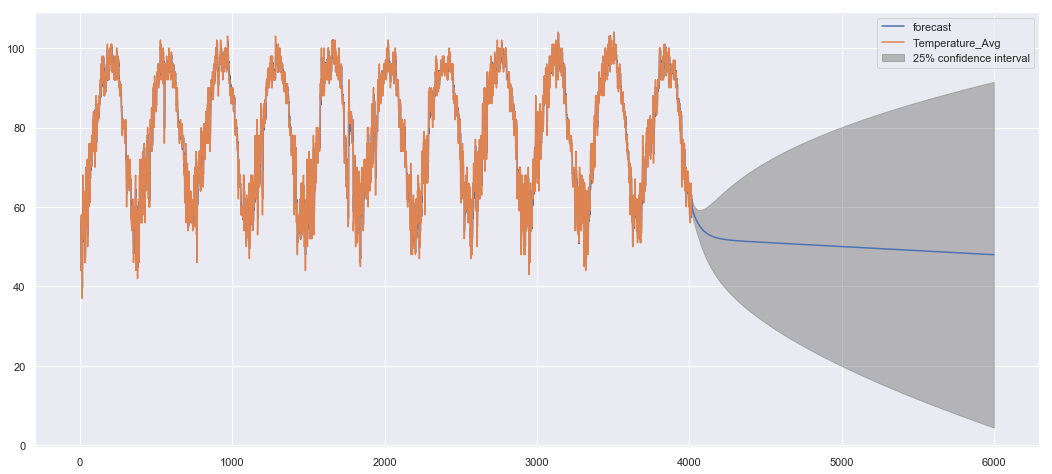

In [400]:
# fit model
model = ARIMA(Temprerature_, order=(5,1,2))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_predict(start=6, end=6000, alpha= 0.75)
plt.show()


In [402]:
model_fit.aic, model_fit.bic

(21619.41494011764, 21676.095073755067)

In [403]:
#diff_Tempreture.info()

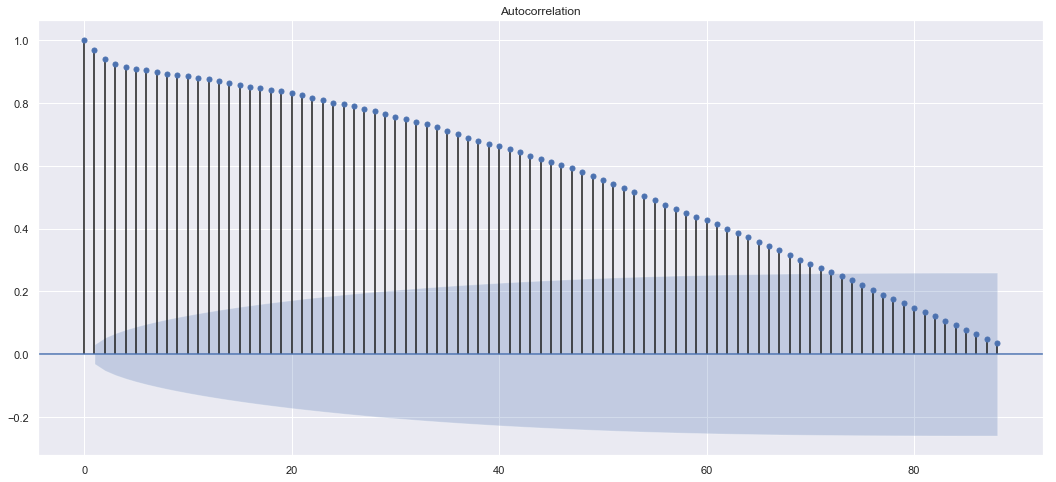

In [378]:
plot_acf(Temprerature_.Temperature_Avg, lags=88);

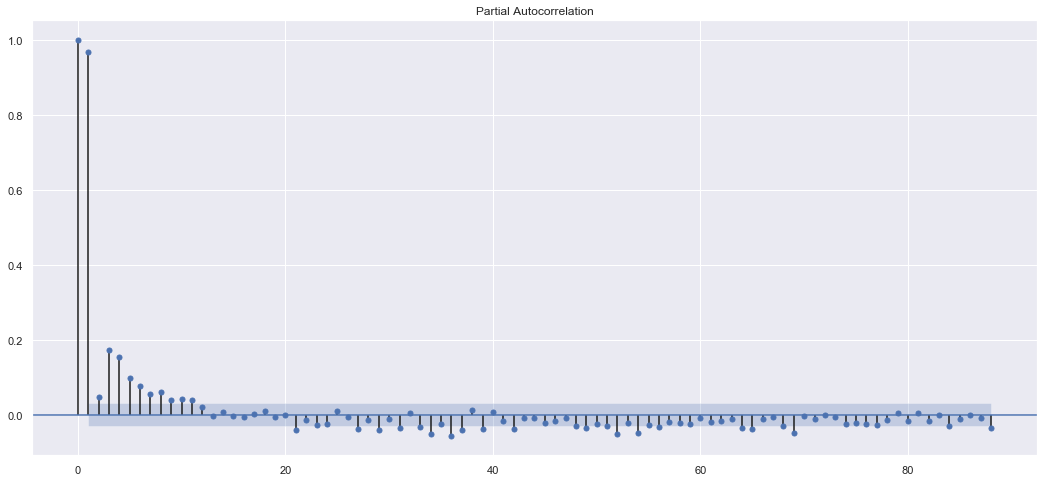

In [379]:
plot_pacf(Temprerature_.Temperature_Avg, lags=88);

In [391]:
# from statsmodels.tsa.arima_model import ARIMA
# model1= ARIMA(diff_Tempreture['Temperature_Avg'], order=(3,2,1), )
# model1 = model1.fit()
# model1.plot_predict(start=2, end=5000, alpha= 0.75)
# plt.show()


In [396]:
model_fit.forecast(steps=200)

(array([61.96111742, 61.01645926, 60.263907  , 59.95088655, 59.76448128,
        59.5788966 , 59.38809731, 59.2142017 , 59.06035161, 58.92035569,
        58.78881448, 58.66337979, 58.5430576 , 58.42707949, 58.31472042,
        58.20540276, 58.09871929, 57.99438549, 57.89219186, 57.79197814,
        57.69362051, 57.59702282, 57.5021092 , 57.40881829, 57.31709915,
        57.22690844, 57.13820839, 57.0509654 , 56.96514891, 56.88073069,
        56.79768429, 56.71598462, 56.63560766, 56.55653029, 56.47873012,
        56.40218537, 56.3268748 , 56.25277765, 56.17987361, 56.10814276,
        56.03756555, 55.9681228 , 55.89979567, 55.83256565, 55.76641454,
        55.70132446, 55.63727784, 55.57425739, 55.51224611, 55.45122729,
        55.3911845 , 55.33210159, 55.27396265, 55.21675207, 55.16045447,
        55.10505475, 55.05053803, 54.9968897 , 54.94409539, 54.89214097,
        54.84101251, 54.79069637, 54.74117908, 54.69244744, 54.64448842,
        54.59728924, 54.55083733, 54.50512031, 54.4